# Video Games Sales

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import squarify
import numpy as np
import os

# Explanation for the database

### Link to dataset (Kaggle)
https://www.kaggle.com/karangadiya/fifa19

### Context
Football analytics

### Content
Detailed attributes for every player registered in the latest edition of FIFA 19 database.
Scraping code at GitHub repo: https://github.com/amanthedorkknight/fifa18-all-player-statistics/tree/master/2019

### Acknowledgements
Data scraped from https://sofifa.com/

### Inspiration
Inspired from this dataset: https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset

## Importing the database

In [2]:
os.getcwd()

'/Users/oleoaraujo/Documents/GitHub/data-ft-par-labs/Projects/Week-4'

In [3]:
fifa = pd.read_csv("data/FIFA19.csv")
fifa.head(15)

Unnamed: 0      ID               Name  Age  \
0            0  158023           L. Messi   31   
1            1   20801  Cristiano Ronaldo   33   
2            2  190871          Neymar Jr   26   
3            3  193080             De Gea   27   
4            4  192985       K. De Bruyne   27   
5            5  183277          E. Hazard   27   
6            6  177003          L. Modrić   32   
7            7  176580          L. Suárez   31   
8            8  155862       Sergio Ramos   32   
9            9  200389           J. Oblak   25   
10          10  188545     R. Lewandowski   29   
11          11  182521           T. Kroos   28   
12          12  182493           D. Godín   32   
13          13  168542        David Silva   32   
14          14  215914           N. Kanté   27   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1    https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2   https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3   https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4   https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
5   https://cdn.sofifa.org/players/4/19/183277.png     Belgium   
6   https://cdn.sofifa.org/players/4/19/177003.png     Croatia   
7   https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
8   https://cdn.sofifa.org/players/4/19/155862.png       Spain   
9   https://cdn.sofifa.org/players/4/19/200389.png    Slovenia   
10  https://cdn.sofifa.org/players/4/19/188545.png      Poland   
11  https://cdn.sofifa.org/players/4/19/182521.png     Germany   
12  https://cdn.sofifa.org/players/4/19/182493.png     Uruguay   
13  https://cdn.sofifa.org/players/4/19/168542.png       Spain   
14  https://cdn.sofifa.org/players/4/19/215914.png      France   

                                   Flag  Overall  Potential  \
0   https://cdn.sofifa.org/flags/52.png       94         94   
1   https://cdn.sofifa.org/flags/38.png       94         94   
2   https://cdn.sofifa.org/flags/54.png       92         93   
3   https://cdn.sofifa.org/flags/45.png       91         93   
4    https://cdn.sofifa.org/flags/7.png       91         92   
5    https://cdn.sofifa.org/flags/7.png       91         91   
6   https://cdn.sofifa.org/flags/10.png       91         91   
7   https://cdn.sofifa.org/flags/60.png       91         91   
8   https://cdn.sofifa.org/flags/45.png       91         91   
9   https://cdn.sofifa.org/flags/44.png       90         93   
10  https://cdn.sofifa.org/flags/37.png       90         90   
11  https://cdn.sofifa.org/flags/21.png       90         90   
12  https://cdn.sofifa.org/flags/60.png       90         90   
13  https://cdn.sofifa.org/flags/45.png       90         90   
14  https://cdn.sofifa.org/flags/18.png       89         90   

                   Club  ... Composure Marking StandingTackle  SlidingTackle  \
0          FC Barcelona  ...      96.0    33.0           28.0           26.0   
1              Juventus  ...      95.0    28.0           31.0           23.0   
2   Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3     Manchester United  ...      68.0    15.0           21.0           13.0   
4       Manchester City  ...      88.0    68.0           58.0           51.0   
5               Chelsea  ...      91.0    34.0           27.0           22.0   
6           Real Madrid  ...      84.0    60.0           76.0           73.0   
7          FC Barcelona  ...      85.0    62.0           45.0           38.0   
8           Real Madrid  ...      82.0    87.0           92.0           91.0   
9       Atlético Madrid  ...      70.0    27.0           12.0           18.0   
10    FC Bayern München  ...      86.0    34.0           42.0           19.0   
11          Real Madrid  ...      85.0    72.0           79.0           69.0   
12      Atlético Madrid  ...      82.0    90.0           89.0           89.0   
13      Mancheste

### Understanding the database

In [4]:
fifa.shape

(18207, 89)

In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [6]:
# Numeric variables
print(fifa.select_dtypes(include='number').dtypes)

Unnamed: 0                    int64
ID                            int64
Age                           int64
Overall                       int64
Potential                     int64
Special                       int64
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Jersey Number               float64
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 float64
Acceleration                float64
SprintSpeed                 float64
Agility                     float64
Reactions                   float64
Balance                     float64
ShotPower                   float64
Jumping                     float64
Stamina                     

In [7]:
# Categorical variables
print(fifa.select_dtypes(include='object').dtypes)

Name                    object
Photo                   object
Nationality             object
Flag                    object
Club                    object
Club Logo               object
Value                   object
Wage                    object
Preferred Foot          object
Work Rate               object
Body Type               object
Real Face               object
Position                object
Joined                  object
Loaned From             object
Contract Valid Until    object
Height                  object
Weight                  object
LS                      object
ST                      object
RS                      object
LW                      object
LF                      object
CF                      object
RF                      object
RW                      object
LAM                     object
CAM                     object
RAM                     object
LM                      object
LCM                     object
CM                      object
RCM     

In [8]:
fifa.describe(include="all")

Unnamed: 0             ID          Name           Age  \
count   18207.000000   18207.000000         18207  18207.000000   
unique           NaN            NaN         17194           NaN   
top              NaN            NaN  J. Rodríguez           NaN   
freq             NaN            NaN            11           NaN   
mean     9103.000000  214298.338606           NaN     25.122206   
std      5256.052511   29965.244204           NaN      4.669943   
min         0.000000      16.000000           NaN     16.000000   
25%      4551.500000  200315.500000           NaN     21.000000   
50%      9103.000000  221759.000000           NaN     25.000000   
75%     13654.500000  236529.500000           NaN     28.000000   
max     18206.000000  246620.000000           NaN     45.000000   

                                                 Photo Nationality  \
count                                            18207       18207   
unique                                           18207         164   
top     https://cdn.sofifa.org/players/4/19/235288.png     England   
freq                                                 1        1662   
mean                                               NaN         NaN   
std                                                NaN         NaN   
min                                                NaN         NaN   
25%                                                NaN         NaN   
50%                                                NaN         NaN   
75%                                                NaN         NaN   
max                                                NaN         NaN   

                                       Flag       Overall     Potential  \
count                                 18207  18207.000000  18207.000000   
unique                                  164           NaN           NaN   
top     https://cdn.sofifa.org/flags/14.png           NaN           NaN   
freq                                   1662           NaN           NaN   
mean                                    NaN     66.238699     71.307299   
std                                     NaN      6.908930      6.136496   
min                                     NaN     46.000000     48.000000   
25%                                     NaN     62.000000     67.000000   
50%                                     NaN     66.000000     71.000000   
75%                                     NaN     71.000000     75.000000   
max                                     NaN     94.000000     95.000000   

               Club  ...     Composure       Marking StandingTackle  \
count         17966  ...  18159.000000  18159.000000   18159.000000   
unique          651  ...           NaN           NaN            NaN   
top     Southampton  ...           NaN           NaN            NaN   
freq             33  ...           NaN           NaN            NaN   
mean            NaN  ...     58.648274     47.281623      47.697836   
std             NaN  ...     11.436133     19.904397      21.664004   
min             NaN  ...      3.000000      3.000000       2.000000   
25%             NaN  ...     51.000000     30.000000      27.000000   
50%             NaN  ...     60.000000     53.000000      55.000000   
75%             NaN  ...     67.000000     64.000000      66.000000   
max             NaN  ...     96.000000     94.000000      93.000000   

        SlidingTackle      GKDiving    GKHandling     GKKicking  \
count    18159.000000  18159.000000  18159.000000  18159.000000   
unique            NaN           NaN           NaN           NaN   
top               NaN           NaN           NaN           NaN   
freq              NaN           NaN           NaN           NaN   
mean        45.661435     16.616223     16.391596     16.232061   
std         21.289135     17.695349     16.906900     16.502864   
min          3.000000      1.000000      1.000000      1.000000   
25%         24.000000      8.000000      8.000000      8.000000   
50%    

## Analyzing and cleaning the database

#### Resetting index

In [9]:
fifa.set_index("ID", inplace=True)
fifa.head()

Unnamed: 0               Name  Age  \
ID                                           
158023           0           L. Messi   31   
20801            1  Cristiano Ronaldo   33   
190871           2          Neymar Jr   26   
193080           3             De Gea   27   
192985           4       K. De Bruyne   27   

                                                 Photo Nationality  \
ID                                                                   
158023  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
20801    https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
190871  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
193080  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
192985  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                       Flag  Overall  Potential  \
ID                                                                
158023  https://cdn.sofifa.org/flags/52.png       94         94   
20801   https://cdn.sofifa.org/flags/38.png       94         94   
190871  https://cdn.sofifa.org/flags/54.png       92         93   
193080  https://cdn.sofifa.org/flags/45.png       91         93   
192985   https://cdn.sofifa.org/flags/7.png       91         92   

                       Club                                     Club Logo  \
ID                                                                          
158023         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png   
20801              Juventus   https://cdn.sofifa.org/teams/2/light/45.png   
190871  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png   
193080    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png   
192985      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png   

        ... Composure Marking  StandingTackle SlidingTackle  GKDiving  \
ID      ...                                                             
158023  ...      96.0    33.0            28.0          26.0       6.0   
20801   ...      95.0    28.0            31.0          23.0       7.0   
190871  ...      94.0    27.0            24.0          33.0       9.0   
193080  ...      68.0    15.0            21.0          13.0      90.0   
192985  ...      88.0    68.0            58.0          51.0      15.0   

        GKHandling  GKKicking GKPositioning GKReflexes Release Clause  
ID                                                                     
158023        11.0       15.0          14.0        8.0        €226.5M  
20801         11.0       15.0          14.0       11.0        €127.1M  
190871         9.0       15.0          15.0       11.0        €228.1M  
193080        85.0       87.0          88.0       94.0        €138.6M  
192985        13.0        5.0          10.0       13.0        €196.4M  

[5 rows x 88 columns]

#### Droping useless columns and resetting index

In [10]:
print(fifa.shape)
fifa.dropna(how="all", axis=0)
fifa.dropna(how="all", axis=1)
print(fifa.shape)

(18207, 88)
(18207, 88)


In [11]:
print(list(fifa.columns))

['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']


In [12]:
fifa.drop(columns=["Unnamed: 0", "Photo", "Flag", "Real Face", "Club Logo"],inplace=True)

In [13]:
print(list(fifa.columns))
print(len(list(fifa.columns)))

['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']
83


#### Agregating Columns with Players Skills

In [14]:
# Based on the website SoFifa.com, the columns aggregates as following:
fifa["Attacking"] = (fifa['Crossing'] + fifa['Finishing'] + fifa['HeadingAccuracy'] + fifa['ShortPassing'] + fifa['Volleys'])/5

fifa["Skill"] = (fifa['Dribbling'] + fifa['Curve'] + fifa['FKAccuracy'] + fifa['LongPassing'] + fifa['BallControl'])/5

fifa["Movement"] = (fifa['Acceleration'] + fifa['SprintSpeed'] + fifa['Agility'] + fifa['Reactions'] + fifa['Balance'])/5

fifa["Power"] = (fifa['ShotPower'] + fifa['Jumping'] + fifa['Stamina'] + fifa['Strength'] + fifa['LongShots'])/5

fifa["Mentality"] = (fifa['Aggression'] + fifa['Interceptions'] + fifa['Positioning'] + fifa['Vision'] + fifa['Penalties'] + fifa['Composure'])/6

fifa["Defending"] = (fifa['Marking'] + fifa['StandingTackle'] + fifa['SlidingTackle'])/3

fifa["Goal Keeping"] = (fifa['GKDiving'] + fifa['GKHandling'] + fifa['GKKicking'] + fifa['GKPositioning'] + fifa['GKReflexes'])/5

# Saving in a new variable in case we need these columns later on

# Droping all columns that have been aggregated
fifa.drop(columns=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                   'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                   'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression','Interceptions',
                   'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle','SlidingTackle',
                   'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'], inplace=True)



# Checking the new result
print(list(fifa.columns))
print(len(list(fifa.columns)))



['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause', 'Attacking', 'Skill', 'Movement', 'Power', 'Mentality', 'Defending', 'Goal Keeping']
56


#### Cleaning countries names

In [15]:
fifa.Nationality = (fifa.Nationality.str.replace("United States", "United States of America")
                    .replace("China PR", "China").replace("DR Congo","Dem. Rep. Congo")
                    .replace("Republic of Ireland","Ireland").replace("Korea Republic","South Korea")
                    .replace("Guinea Bissau",'Guinea-Bissau').replace('FYR Macedonia','Macedonia'))

#### Cleaning column "Release Clause"

In [16]:
# Checking that I only have numbers finishing by "K" and "M"
set(fifa["Release Clause"].str[-1:])

{'K', 'M', nan}

In [17]:
# Checking the number of NaNs
print(fifa["Release Clause"].isna().sum())

# Filling the NaNs with 0 (hypothesis: they don't have a release clause)
fifa["Release Clause"].fillna("0", inplace=True)

# Checking the result
print(fifa["Release Clause"].isna().sum())

1564
0


In [18]:
def clean_currencies(df, column_name):
    """Function to clean and uniformize all the columns with currencies in euros (€)
    
    Input: dataframe
    Output: dataframe with columns cleaned from the currency number and transformed to millions units
    """
    
    # Cleaning the currency from the cells
    df["Support_column"] = df[column_name].str.replace("€","")

    # Cleaning the Release clause from its units ("M" for Million or "K" for Thousands)
    transform_to_euros = lambda x: (float(x[:len(x)-1])*10**6) if (x[-1]=="M") else (float(x[:len(x)-1])*10**3 if x[-1]=="K" else float(x))
    df["Support_column"] = df["Support_column"].apply(transform_to_euros)

    # Now formating it so it show values in M€ for all cells 
    divide_by_million = lambda x: x/1000000
    df["Support_column"] = df["Support_column"].apply(divide_by_million).round(3)

    # Droping ancient columns, leaving only our main column
    df.rename(columns={"Support_column":(str(column_name)+" (M€)")}, inplace=True)
    df.drop(columns=[str(column_name)], inplace=True)

    return df


# Applying the cleanup function stated before
fifa = clean_currencies(fifa, "Release Clause")
fifa = clean_currencies(fifa, "Value")
fifa = clean_currencies(fifa, "Wage")
fifa

Name  Age Nationality  Overall  Potential  \
ID                                                                
158023            L. Messi   31   Argentina       94         94   
20801    Cristiano Ronaldo   33    Portugal       94         94   
190871           Neymar Jr   26      Brazil       92         93   
193080              De Gea   27       Spain       91         93   
192985        K. De Bruyne   27     Belgium       91         92   
...                    ...  ...         ...      ...        ...   
238813        J. Lundstram   19     England       47         65   
243165  N. Christoffersson   19      Sweden       47         63   
241638           B. Worman   16     England       47         67   
246268      D. Walker-Rice   17     England       47         66   
246269           G. Nugent   16     England       46         66   

                       Club  Special Preferred Foot  International Reputation  \
ID                                                                              
158023         FC Barcelona     2202           Left                       5.0   
20801              Juventus     2228          Right                       5.0   
190871  Paris Saint-Germain     2143          Right                       5.0   
193080    Manchester United     1471          Right                       4.0   
192985      Manchester City     2281          Right                       4.0   
...                     ...      ...            ...                       ...   
238813      Crewe Alexandra     1307          Right                       1.0   
243165       Trelleborgs FF     1098          Right                       1.0   
241638     Cambridge United     1189          Right                       1.0   
246268      Tranmere Rovers     1228          Right                       1.0   
246269      Tranmere Rovers     1321          Right                       1.0   

        Weak Foot  ...  Attacking Skill Movement Power  Mentality  Defending  \
ID                 ...                                                         
158023        4.0  ...       85.0  93.4     91.6  75.6  71.500000  29.000000   
20801         4.0  ...       87.0  83.2     86.6  90.0  74.833333  27.333333   
190871        5.0  ...       79.2  88.8     91.6  70.6  73.833333  28.000000   
193080        3.0  ...       22.8  30.2     61.6  43.4  42.666667  16.333333   
192985        5.0  ...       80.8  87.2     80.2  82.0  80.833333  59.000000   
...           ...  ...        ...   ...      ...   ...        ...        ...   
238813        2.0  ...       37.2  38.8     59.2  44.6  45.166667  45.000000   
243165        2.0  ...       41.2  31.2     42.0  48.0  37.833333  18.666667   
241638        3.0  ...       37.4  36.4     58.8  47.4  39.000000  18.666667   
246268        3.0  ...       43.0  40.2     53.0  45.6  40.333333  24.000000   
246269        3.0  ...       39.8  42.4     56.2  48.8  42.833333  44.333333   

       Goal Keeping Release Clause (M€) Value (M€) Wage (M€)  
ID                                                            
158023         10.8             226.500     110.50     0.565  
20801          11.6             127.100      77.00     0.405  
190871         11.8             228.100     118.50     0.290  
193080         88.8             138.600      72.00     0.260  
192985         11.2             196.400     102.00     0.355  
...             ...                 ...        ...       ...  
238813          9.4               0.143       0.06     0.001  
243165          9.0               0.113       0.06     0.001  
241638          8.0               0.165       0.06     0.001  
246268         10.2               0.143       0.06     0.001  
246269         11.0               0.165       0.06     0.001  

[18207 rows x 56 columns]

### Count of unique values

In [19]:
fifa.nunique()

Name                        17194
Age                            29
Nationality                   164
Overall                        48
Potential                      47
Club                          651
Special                      1422
Preferred Foot                  2
International Reputation        5
Weak Foot                       5
Skill Moves                     5
Work Rate                       9
Body Type                      10
Position                       27
Jersey Number                  99
Joined                       1736
Loaned From                   341
Contract Valid Until           36
Height                         21
Weight                         57
LS                             93
ST                             93
RS                             93
LW                            105
LF                            102
CF                            102
RF                            102
RW                            105
LAM                           101
CAM           

In [20]:
# We have some names that are not unique, but they seemly correspond to different people,
# as we can see by checking their Club, Nationality and Age
fifa[fifa.Name=="J. Rodríguez"]

Name  Age Nationality  Overall  Potential  \
ID                                                          
198710  J. Rodríguez   26    Colombia       88         89   
192009  J. Rodríguez   25      Mexico       74         77   
223816  J. Rodríguez   24     Uruguay       74         79   
224796  J. Rodríguez   22   Argentina       70         77   
193293  J. Rodríguez   33     Uruguay       69         69   
237131  J. Rodríguez   22      Mexico       66         75   
220605  J. Rodríguez   22    Colombia       66         76   
214485  J. Rodríguez   25    Colombia       65         68   
244950  J. Rodríguez   24   Argentina       63         70   
205267  J. Rodríguez   25      Mexico       58         64   
244951  J. Rodríguez   20      Mexico       57         66   

                          Club  Special Preferred Foot  \
ID                                                       
198710       FC Bayern München     2171           Left   
192009              Lobos BUAP     1217          Right   
223816           Santos Laguna     1884          Right   
224796  Club Atlético Banfield     1526          Right   
193293            CD Palestino     1839           Left   
237131               Club León     1712           Left   
220605             CD Tenerife     1726          Right   
214485             Once Caldas     1696           Left   
244950  San Martín de San Juan     1421          Right   
205267               Puebla FC     1145          Right   
244951               Puebla FC     1546           Left   

        International Reputation  Weak Foot  ...  Attacking Skill Movement  \
ID                                           ...                             
198710                       4.0        3.0  ...       82.8  86.6     76.8   
192009                       1.0        3.0  ...       19.4  18.2     57.6   
223816                       1.0        3.0  ...       67.0  63.2     78.2   
224796                       1.0        2.0  ...       46.2  39.8     60.8   
193293                       1.0        1.0  ...       58.8  70.0     69.6   
237131                       1.0        3.0  ...       52.2  54.8     69.0   
220605                       1.0        4.0  ...       58.8  66.0     76.4   
214485                       1.0        3.0  ...       54.4  54.0     67.0   
244950                       1.0        2.0  ...       40.6  39.8     56.2   
205267                       1.0        2.0  ...       18.0  18.4     62.8   
244951                       1.0        3.0  ...       48.6  51.2     63.2   

       Power  Mentality  Defending Goal Keeping Release Clause (M€)  \
ID                                                                    
198710  74.0  76.000000  45.666667         12.8               0.000   
192009  44.6  27.833333  13.000000         72.4               0.000   
223816  75.6  62.000000  36.000000         10.6              13.300   
224796  58.6  48.666667  68.333333         11.0               3.600   
193293  66.6  63.666667  48.000000         11.2               0.878   
237131  60.6  58.000000  62.333333          9.8               1.600   
220605  56.4  56.166667  38.666667         11.2               1.900   
214485  65.0  59.833333  45.666667         12.8               0.962   
244950  52.2  47.666667  65.000000         10.8               0.743   
205267  45.0  24.166667  12.000000         56.4               0.247   
244951  53.4  51.000000  48.000000         11.4               0.304   

       Value (M€) Wage (M€)  
ID                           
198710     69.500     0.315  
192009      5.000     0.022  
223816      7.500     0.018  
224796      2.100     0.007  
193293      0.650     0.003  
237131      0.850     0.007  
220605      1.000     0.003  
214485      0.675     0.001  
244950      0.450     0.002  
205267      0.130     0.001  
244951      0.160     0.001  

[11 rows x 56 columns]

# Visualizing some data

#### First, trying to understand how 2 variables relate to each other

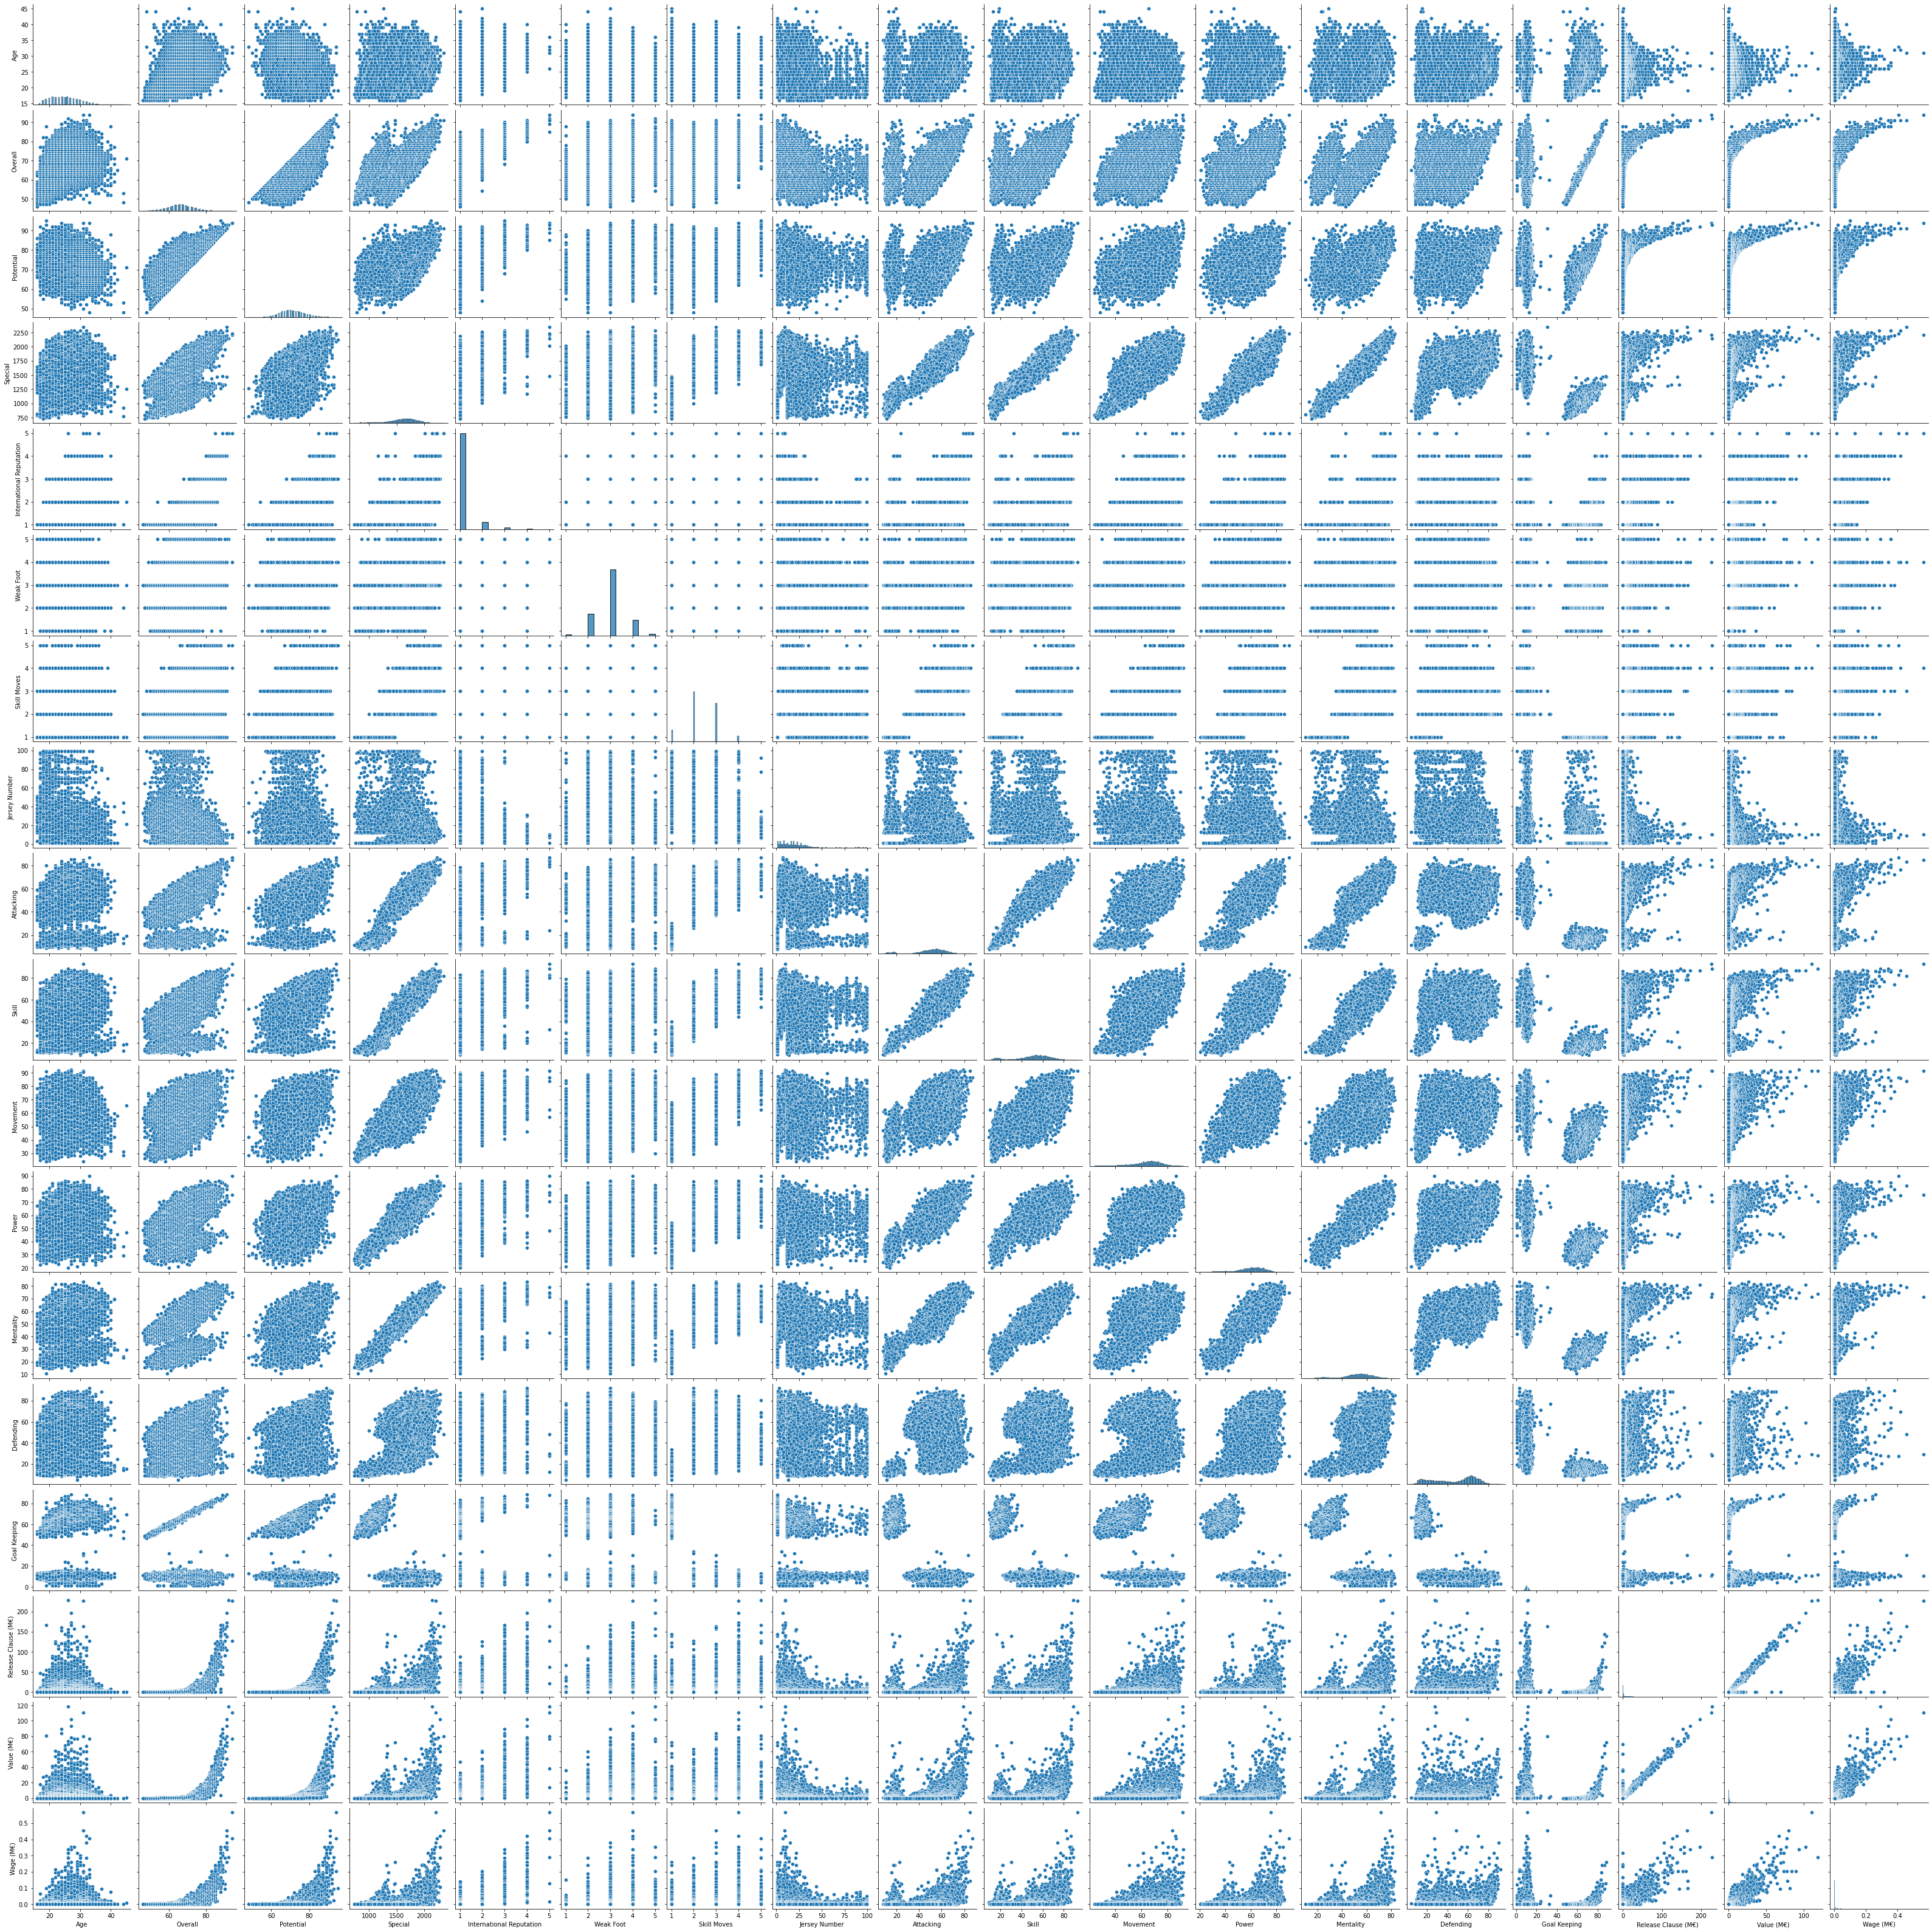

In [21]:
sns.pairplot(fifa)
plt.show()

## Most popular Jersey Number

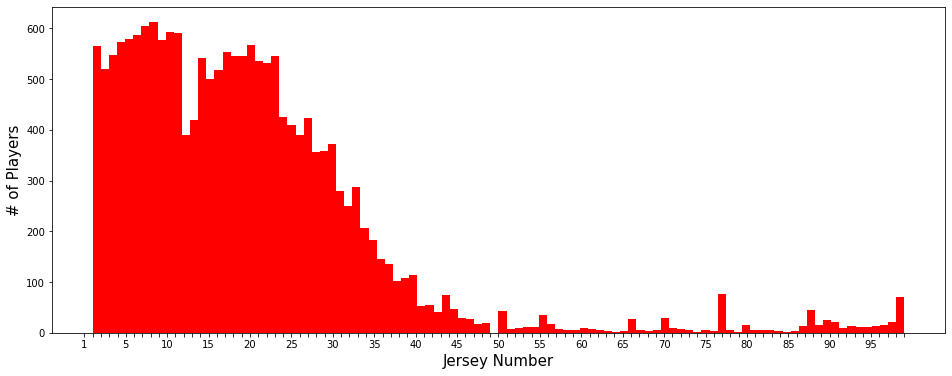

In [22]:
# Let's do this by plotting a histogram with the distribution of releases by year
fifa["Jersey Number"].hist(bins=100,figsize=(16,6), grid=False, color="red")
plt.xlabel("Jersey Number", size=15)
plt.xticks(range(100), labels = [1,"","","","",5,"","","","",10,"","","","",15,"","","","",20,"","","","",25,"","","","",30,"","","","",35,"","","","",40,"","","","",45,"","","","",50,"","","","",55,"","","","",60,"","","","",65,"","","","",70,"","","","",75,"","","","",80,"","","","",85,"","","","",90,"","","","",95,"","","",""])
plt.ylabel("# of Players", size=15)
plt.show()

## Age Distribution

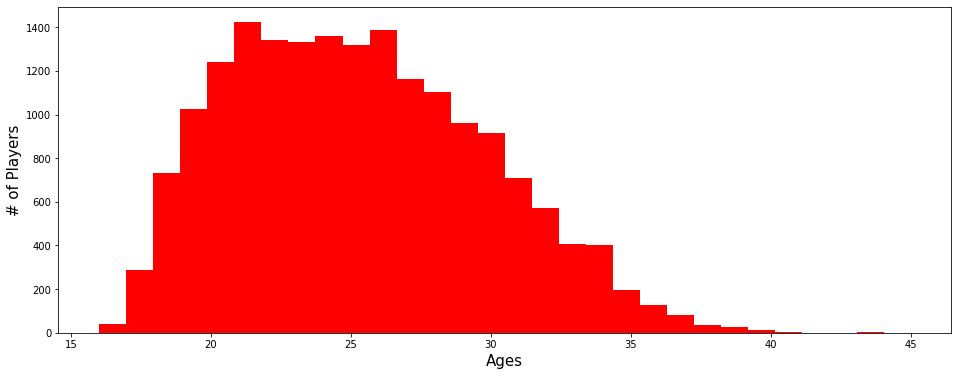

In [23]:
# Let's do this by plotting a histogram with the distribution of releases by year
fifa["Age"].hist(bins=30,figsize=(16,6), grid=False, color="red")
plt.xlabel("Ages", size=15)
plt.ylabel("# of Players", size=15)
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


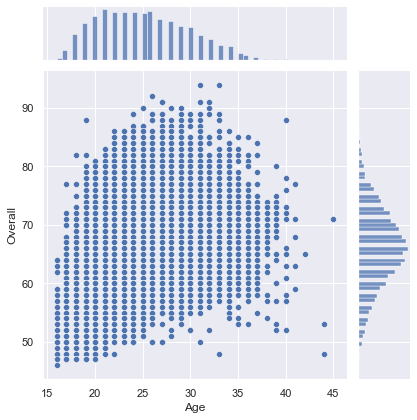

In [238]:
# Let's try with a violinplot
sns.jointplot(fifa["Age"], fifa["Overall"])
#fifa["Age"].hist(bins=30,figsize=(16,6), grid=False, color="red")
#plt.xlabel("Ages", size=15)
#plt.ylabel("# of Players", size=15)
#plt.show()

## Week foot

In [24]:
fifa["Overall"].groupby(fifa["Preferred Foot"]).mean()

Preferred Foot
Left     66.801472
Right    66.083381
Name: Overall, dtype: float64

In [25]:
fifa["Potential"].groupby(fifa["Preferred Foot"]).mean()

Preferred Foot
Left     71.739492
Right    71.192214
Name: Potential, dtype: float64

In conclusion, the preferred Foot has NO significant effect on the Rating of players.

## Country of origin of players

<AxesSubplot:>

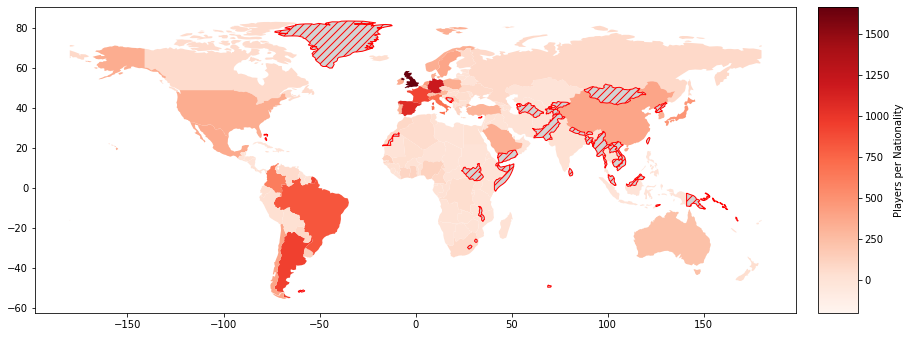

In [26]:
# Importing the world map Geopandas
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Formatting the world data to fit my Fifa dataset (excludin Antartica, droping useless columns and renaming countries)
world_data = world_data[world_data.name!="Antarctica"]
world_data.drop(columns=["pop_est","gdp_md_est"], inplace=True)
world_data.rename(columns={"name":"Country"}, inplace=True)
world_data.Country = (world_data.Country.str.replace("Côte d'Ivoire","Ivory Coast").replace("Czechia","Czech Republic")
                      .replace('Dominican Rep.','Dominican Republic').replace("Trinidad and Tobago","Trinidad & Tobago")
                      .replace("United Kingdom","England").replace("Eq. Guinea",'Equatorial Guinea'))

# Counting the number of players per country
players_per_country = fifa.groupby("Nationality")["Name"].count()
players_per_country = players_per_country.reset_index().rename(columns={"Nationality":"Country","Name":"Count_Players"})
#players_per_country.head(20)

# Joining the count from previously with the Geopandas World_Data 
world_data = world_data.merge(players_per_country, left_on="Country", right_on="Country", how="left")
#world_data.isna().sum()

# Formating the axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1, figsize=(15,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plotting the number of players per country in a Geopandas Map
world_data.plot(column=world_data["Count_Players"], legend=True, ax=ax, cax=cax, cmap='Reds', vmin=-199,
                legend_kwds={'label': "Players per Nationality"}, missing_kwds={
                 "color": "lightgrey",
                 "edgecolor": "red",
                 "hatch": "///",
                 "label": "Missing values"})


#### Blabla

## Rating

In [27]:
print(list(set(fifa.Age)))

[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45]


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall', ylabel='Potential'>

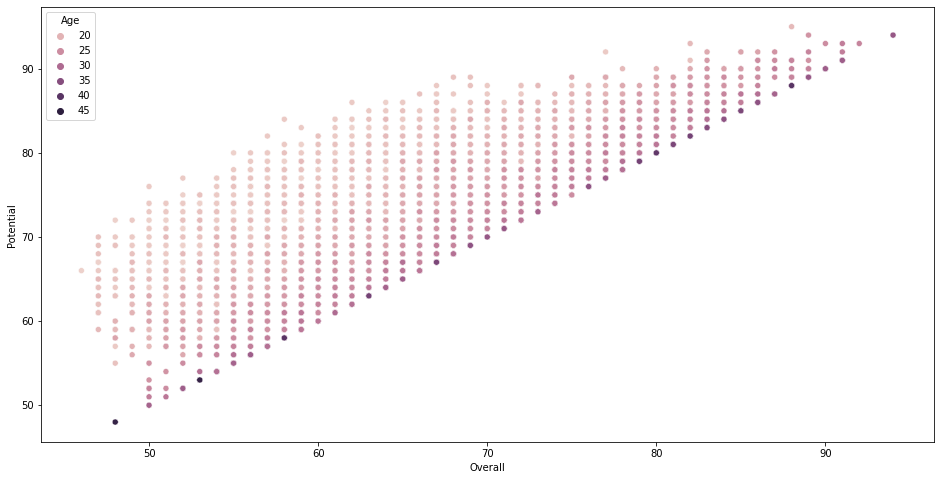

In [28]:
# Plotting the relationship between Overall and Potential Ratings
fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(x=fifa["Overall"], y=fifa["Potential"], hue=fifa.Age)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


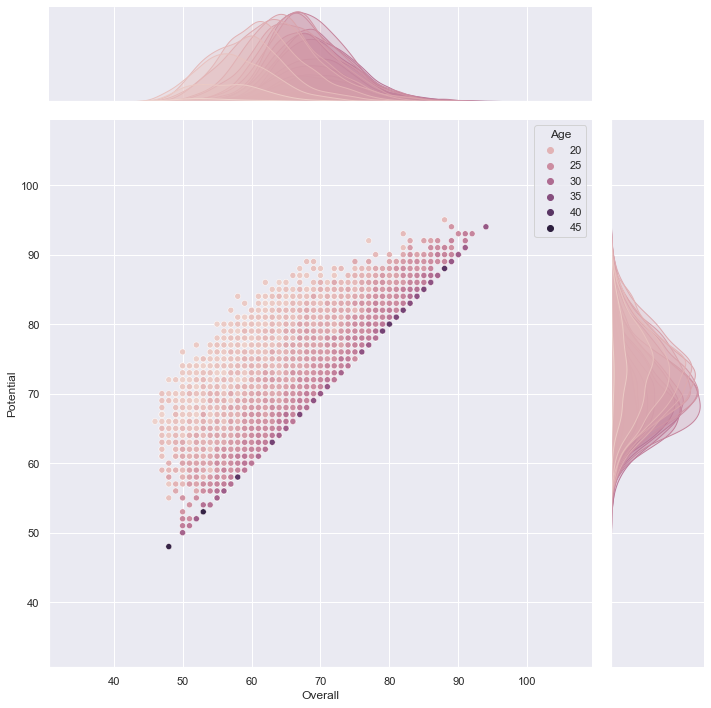

In [244]:
sns.jointplot(x=fifa["Overall"], y=fifa["Potential"], hue=fifa.Age, height=10)

## Heatmap (Correlation matrix) between Player Rating and his skills

<AxesSubplot:>

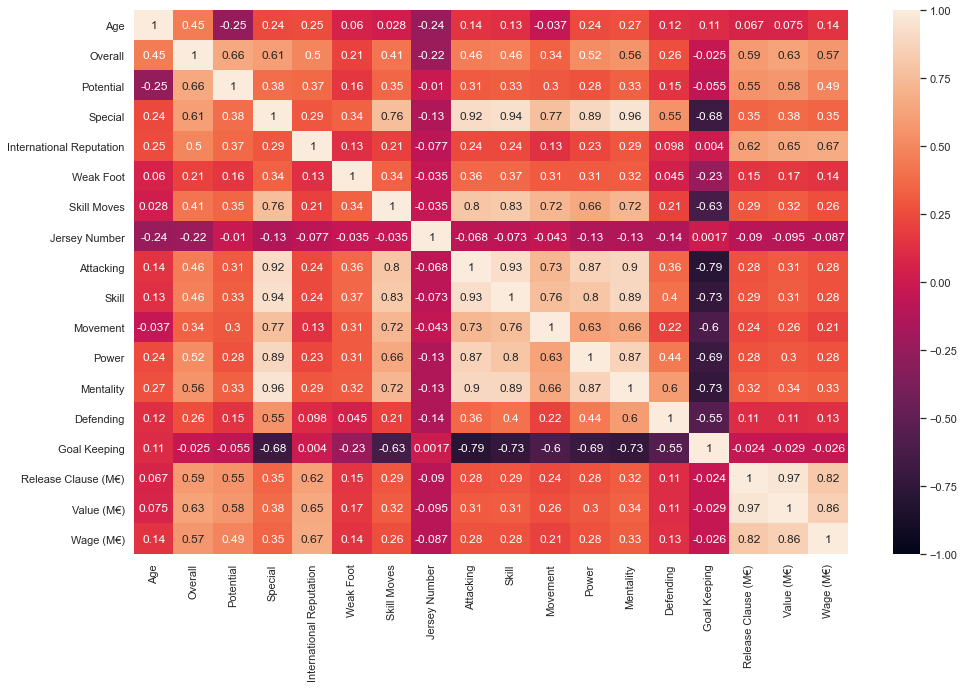

In [233]:
# After cleaning the data
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(fifa.select_dtypes(include=np.number).corr(), vmin=-1.0, annot=True)

In [31]:
fifa.corr()

Age   Overall  Potential   Special  \
Age                       1.000000  0.452350  -0.253312  0.236695   
Overall                   0.452350  1.000000   0.660939  0.606960   
Potential                -0.253312  0.660939   1.000000  0.383727   
Special                   0.236695  0.606960   0.383727  1.000000   
International Reputation  0.253765  0.499491   0.372993  0.292208   
Weak Foot                 0.059867  0.212015   0.162346  0.341855   
Skill Moves               0.027649  0.414463   0.354290  0.763412   
Jersey Number            -0.241156 -0.218931  -0.010474 -0.133716   
Attacking                 0.144997  0.457459   0.305673  0.919162   
Skill                     0.131127  0.463617   0.327328  0.938637   
Movement                 -0.036911  0.340634   0.300880  0.772957   
Power                     0.244178  0.524342   0.281179  0.892299   
Mentality                 0.267770  0.562444   0.333669  0.957999   
Defending                 0.124475  0.259651   0.148370  0.548839   
Goal Keeping              0.107774 -0.024544  -0.055270 -0.680655   
Release Clause (M€)       0.066967  0.589200   0.547668  0.351100   
Value (M€)                0.075022  0.627085   0.576218  0.377738   
Wage (M€)                 0.141145  0.571926   0.486413  0.347835   

                          International Reputation  Weak Foot  Skill Moves  \
Age                                       0.253765   0.059867     0.027649   
Overall                                   0.499491   0.212015     0.414463   
Potential                                 0.372993   0.162346     0.354290   
Special                                   0.292208   0.341855     0.763412   
International Reputation                  1.000000   0.128317     0.208153   
Weak Foot                                 0.128317   1.000000     0.340721   
Skill Moves                               0.208153   0.340721     1.000000   
Jersey Number                            -0.077298  -0.035410    -0.035194   
Attacking                                 0.237101   0.361822     0.804298   
Skill                                     0.238155   0.365362     0.825437   
Movement                                  0.134427   0.311291     0.724413   
Power                                     0.228133   0.307044     0.662774   
Mentality                                 0.289498   0.317979     0.719395   
Defending                                 0.097703   0.045455     0.214787   
Goal Keeping                              0.003964  -0.234645    -0.627833   
Release Clause (M€)                       0.618094   0.149584     0.289268   
Value (M€)                                0.653176   0.165221     0.315651   
Wage (M€)                                 0.668635   0.140849     0.263205   

                          Jersey Number  Attacking     Skill  Movement  \
Age                           -0.241156   0.144997  0.131127 -0.036911   
Overall                       -0.218931   0.457459  0.463617  0.340634   
Potential                     -0.010474   0.305673  0.327328  0.300880   
Special                       -0.133716   0.919162  0.938637  0.772957   
International Reputation      -0.077298   0.237101  0.238155  0.134427   
Weak Foot                     -0.035410   0.361822  0.365362  0.311291   
Skill Moves                   -0.035194   0.804298  0.825437  0.724413   
Jersey Number                  1.000000  -0.068329 -0.072754 -0.043135   
Attacking                     -0.068329   1.000000  0.934033  0.733885   
Skill                         -0.072754   0.934033  1.000000  0.761618   
Movement                      -0.043135   0.733885  0.761618  1.000000   
Power                         -0.127681   0.867857  0.804010  0.631189   
Mentality                     -0.133553   0.896297  0.892657  0.657583   
Defending                     -0.136621   0.361867  0.402602  0.218107   
Goal Keeping                   0.001672  -0.786441 -0.730509 -0.599186   
Release Clause (M€)           -0.089806   0.280054  

## Which one is the best team ?

My criteria for defining the best team is the team with the best average of Overall Ratings.

In [32]:
fifa.Overall.groupby(fifa.Club).mean().sort_values()

Club
Bray Wanderers    53.652174
Limerick FC       54.526316
Bohemian FC       55.000000
Derry City        55.777778
Sligo Rovers      56.631579
                    ...    
Milan             78.074074
Real Madrid       78.242424
Inter             79.750000
Napoli            80.000000
Juventus          82.280000
Name: Overall, Length: 651, dtype: float64

In [49]:
fifa_clubs = fifa.groupby(fifa.Club).mean().sort_values("Overall", ascending=False).head(30)
fifa_clubs

Age    Overall  Potential      Special  \
Club                                                                
Juventus             27.160000  82.280000  85.520000  1904.400000   
Napoli               25.920000  80.000000  83.440000  1856.960000   
Inter                27.458333  79.750000  81.750000  1836.958333   
Real Madrid          24.030303  78.242424  84.636364  1818.939394   
Milan                25.000000  78.074074  82.555556  1823.296296   
FC Barcelona         23.848485  78.030303  85.303030  1842.151515   
Paris Saint-Germain  24.566667  77.433333  83.566667  1856.533333   
Roma                 25.653846  77.423077  82.192308  1792.076923   
Manchester United    24.757576  77.242424  82.666667  1882.333333   
FC Bayern München    24.310345  77.000000  83.655172  1793.482759   
SL Benfica           24.500000  77.000000  81.500000  1846.321429   
Chelsea              25.212121  76.787879  82.636364  1810.484848   
Manchester City      23.909091  76.727273  83.909091  1836.878788   
Tottenham Hotspur    24.606061  76.696970  82.060606  1831.060606   
FC Porto             24.964286  76.678571  81.178571  1811.071429   
Sporting CP          26.133333  76.133333  79.400000  1818.200000   
Liverpool            24.000000  76.000000  82.393939  1834.909091   
Bayer 04 Leverkusen  24.346154  75.807692  81.000000  1724.846154   
Lazio                25.312500  75.437500  79.437500  1801.062500   
Borussia Dortmund    23.090909  75.333333  82.393939  1805.575758   
Sevilla FC           25.266667  75.200000  79.466667  1802.966667   
Real Betis           25.370370  75.185185  79.703704  1748.555556   
Arsenal              24.606061  75.181818  81.393939  1770.060606   
Atlético Madrid      23.757576  75.060606  82.454545  1757.787879   
SC Braga             25.035714  74.821429  78.571429  1759.571429   
Valencia CF          23.060606  74.696970  81.454545  1765.242424   
Villarreal CF        26.593750  74.343750  78.031250  1751.437500   
FC Schalke 04        25.000000  74.310345  79.655172  1778.620690   
Everton              24.212121  74.121212  79.969697  1765.060606   
Leicester City       25.562500  73.843750  78.250000  1764.718750   

                     International Reputation  Weak Foot  Skill Moves  \
Club                                                                    
Juventus                             2.520000   3.200000     2.880000   
Napoli                               2.160000   3.360000     2.880000   
Inter                                2.166667   3.291667     2.875000   
Real Madrid                          2.090909   3.212121     2.848485   
Milan                                2.111111   3.000000     2.925926   
FC Barcelona                         2.242424   3.272727     2.848485   
Paris Saint-Germain                  2.233333   3.233333     3.100000   
Roma                                 2.000000   3.076923     2.730769   
Manchester United                    2.090909   3.212121     3.030303   
FC Bayern München                    2.517241   3.206897     2.862069   
SL Benfica                           1.571429   3.214286     2.785714   
Chelsea                              2.121212   3.333333     2.787879   
Manchester City                      2.090909   3.151515     2.787879   
Tottenham Hotspur                    2.000000   3.060606     2.787879   
FC Porto                             1.892857   2.857143     2.785714   
Sporting CP                          1.533333   2.766667     2.700000   
Liverpool                            1.969697   3.060606     3.030303   
Bayer 04 Leverkusen                  1.653846   3.269231     2.653846   
Lazio                                1.593750   3.156250     2.812500   
Borussia Dortmund                    2.000000   3.333333     2.939394   
Sevilla FC                           1.633333   3.000000     2.833333   
Real Betis                           1.481481   3.111111     2.740741   
Arsenal                              2.030303   2.969697     2.757

Text(0, 0.5, 'Potential Rating')

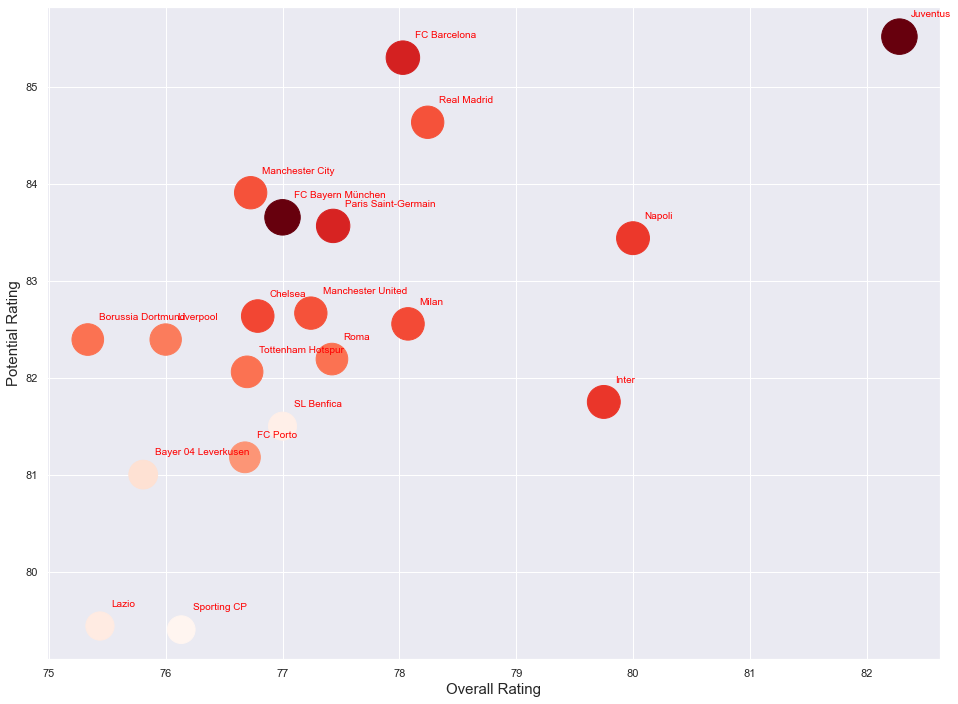

In [117]:
fifa_clubs = fifa.groupby(fifa.Club).mean().sort_values("Overall", ascending=False).head(20)

#sns.set(rc={'figure.figsize':(16,12)})
#sns.color_palette("rocket", as_cmap=True)

plt.scatter(x=fifa_clubs.Overall, y=fifa_clubs.Potential, s=fifa_clubs["International Reputation"]*500,
            c=fifa_clubs["International Reputation"], cmap="Reds", )

# Printing the name of each club next to its dot
for i in range(fifa_clubs.shape[0]):
    plt.text(x=fifa_clubs.Overall[i]+0.1,  y=fifa_clubs.Potential[i]+0.2,  s=fifa_clubs.index[i], 
          fontdict=dict(color="red",size=10))
    
# Establishing axes values
plt.xlabel("Overall Rating", size=15)
plt.ylabel("Potential Rating", size=15)

## Trying to come up with the best team ever

First, here's an example of the possible positions for a player (taken out from the Messi file on sofifa.com):

<img src="Players/Possible Positions.png" width="500">

In [33]:
# Understanding how the columns are structured
fifa[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB',
      'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']]

LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM  ...   LWB  \
ID                                                                  ...         
158023  88+2  88+2  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  ...  64+2   
20801   91+3  91+3  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  ...  65+3   
190871  84+3  84+3  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  ...  65+3   
193080   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
192985  82+3  82+3  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  ...  77+3   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
238813  42+2  42+2  42+2  44+2  44+2  44+2  44+2  44+2  45+2  45+2  ...  44+2   
243165  45+2  45+2  45+2  39+2  42+2  42+2  42+2  39+2  40+2  40+2  ...  30+2   
241638  45+2  45+2  45+2  45+2  46+2  46+2  46+2  45+2  44+2  44+2  ...  34+2   
246268  47+2  47+2  47+2  47+2  46+2  46+2  46+2  47+2  45+2  45+2  ...  36+2   
246269  43+2  43+2  43+2  45+2  44+2  44+2  44+2  45+2  45+2  45+2  ...  46+2   

         LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  
ID                                                            
158023  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2  
20801   61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
190871  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3  
193080   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
192985  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3  
...      ...   ...   ...   ...   ...   ...   ...   ...   ...  
238813  45+2  45+2  45+2  44+2  45+2  45+2  45+2  45+2  45+2  
243165  31+2  31+2  31+2  30+2  29+2  32+2  32+2  32+2  29+2  
241638  30+2  30+2  30+2  34+2  33+2  28+2  28+2  28+2  33+2  
246268  32+2  32+2  32+2  36+2  35+2  31+2  31+2  31+2  35+2  
246269  46+2  46+2  46+2  46+2  46+2  47+2  47+2  47+2  46+2  

[18207 rows x 26 columns]

#### Collecting the best player for every position

In [163]:
# Storing the name of all positions in a variable
columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM',
           'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

# Creation of a dictionary with the best player for each position
best_players = {}
player = ""
for col in columns:
    # Verification of all the ratings and sorting them out in descending order
    rating = sorted(list(set(fifa[col].fillna(""))), reverse=True)
    
    check = False
    for i in range(len(rating)):
        # Taking the best ranking:
        best_rating = rating[i]
        
        for player in list(fifa.Name[fifa[col]==best_rating]):
            if player not in best_players.values():
                best_players.update({col : player})
                check = True
                break

        if check==True:
            break
best_players

{'LS': 'Cristiano Ronaldo',
 'ST': 'L. Messi',
 'RS': 'L. Suárez',
 'LW': 'Neymar Jr',
 'LF': 'E. Hazard',
 'CF': 'K. De Bruyne',
 'RF': 'A. Griezmann',
 'RW': 'P. Dybala',
 'LAM': 'L. Modrić',
 'CAM': 'David Silva',
 'RAM': 'Coutinho',
 'LM': 'K. Mbappé',
 'LCM': 'T. Kroos',
 'CM': 'C. Eriksen',
 'RCM': 'Marcelo',
 'RM': 'M. Salah',
 'LWB': 'N. Kanté',
 'LDM': 'Sergio Busquets',
 'CDM': 'Casemiro',
 'RDM': 'Sergio Ramos',
 'RWB': 'Jordi Alba',
 'LB': 'Azpilicueta',
 'LCB': 'D. Godín',
 'CB': 'G. Chiellini',
 'RCB': 'M. Hummels',
 'RB': 'Alex Sandro'}

#### Plotting each player in the best position

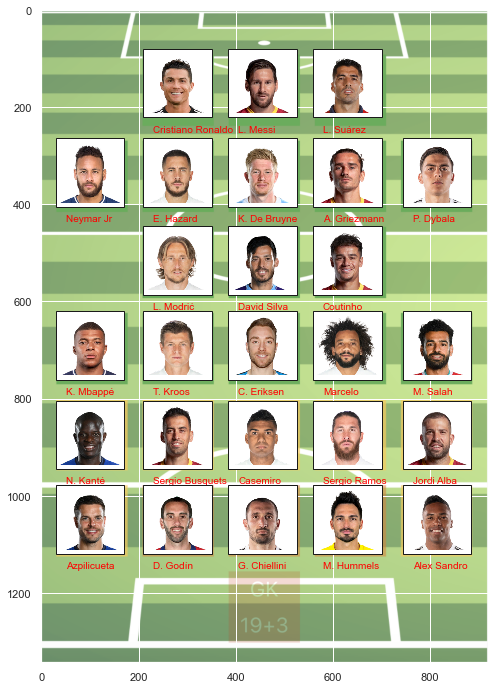

In [213]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

fig, ax = plt.subplots()

img = plt.imread("Players/Possible Positions.png")

# Storing the positions of the players in the graph:
positions = {'LS':(280,150), 'ST':(455,150), 'RS':(630,150),
             'LW':(100,335), 'LF':(280,335), 'CF':(455,335), 'RF':(630,335), 'RW':(815,335),
             'LAM':(280,515), 'CAM':(455,515), 'RAM':(630,515),
             'LM':(100,690), 'LCM':(280,690), 'CM':(455,690),'RCM':(630,690), 'RM':(815,690),
             'LWB':(100,875), 'LDM':(280,875), 'CDM':(455,875), 'RDM':(630,875), 'RWB':(815,875),
             'LB':(100,1050), 'LCB':(280,1050), 'CB':(455,1050), 'RCB':(630,1050), 'RB':(815,1050)}

# Printing the photo of each player
for player in best_players:
    player_pic = mpimg.imread('Players/'+best_players[player]+'.webp')
    imagebox = OffsetImage(player_pic, zoom=0.25)
    ab = AnnotationBbox(imagebox, (positions[player][0], positions[player][1]))
    ax.add_artist(ab)

# Printing the name of each club next to its dot
    plt.text(x=positions[player][0]-50,  y=positions[player][1]+100,  s=best_players[player], 
          fontdict=dict(color="red",size=10))
    
ax.imshow(img)

## 

## Players values (Market value, wage and release clause)

<AxesSubplot:xlabel='Wage (M€)', ylabel='Value (M€)'>

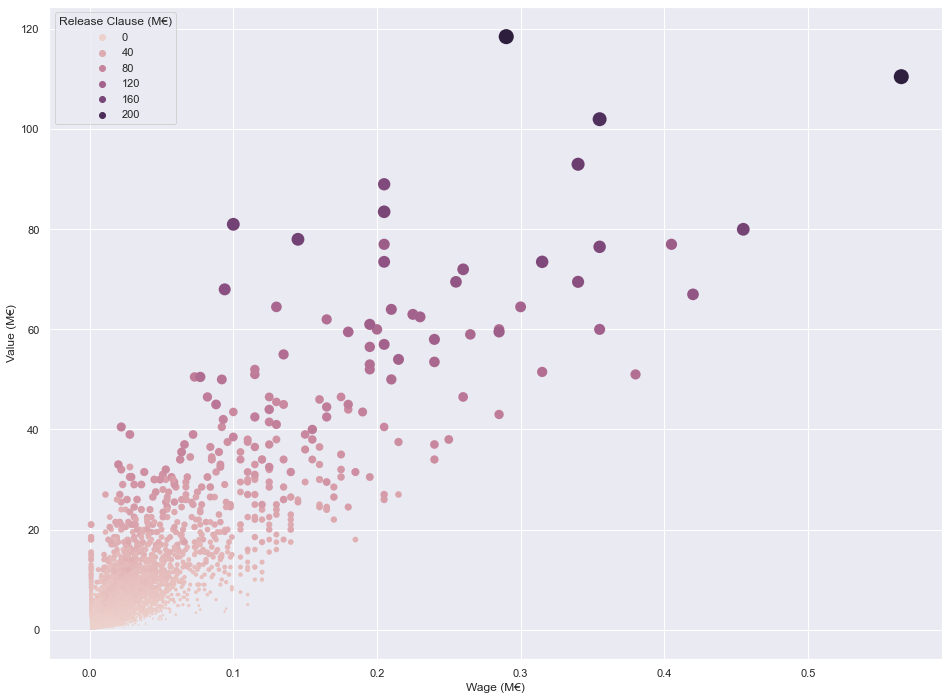

In [230]:
sns.scatterplot(x=fifa["Wage (M€)"], y=fifa["Value (M€)"], s=fifa["Release Clause (M€)"],
                hue=fifa["Release Clause (M€)"],
                cmap="Reds")



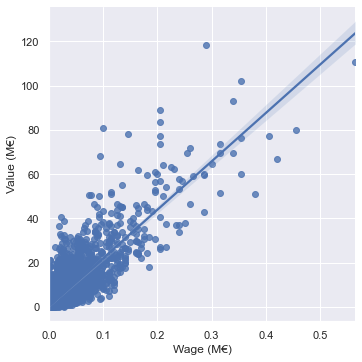

In [232]:
sns.lmplot(x="Wage (M€)", y="Value (M€)", data=fifa)